# A/B Test Analysis: Acquisition Funnel for Fitness Club

### *Kim Kirk <br> November 18, 2020*

## Synopsis

A descriptive and inferential data analysis was performed on the the A/B test results for a fitness club's acquisition funnel. 5,004 rows were imported, cleaned, and analyzed. The analysis showed with confidence (statistical significance) several results. For Stage 1 of the acquisition funnel there is a higher percentage of visitors who apply for a gym membership that do not take the fitness test. For Stage 2 of the acquisition funnel, for visitors who did turn in an application, it seems that there are not more people who took the fitness test who also purchased a gym membership. For the Stage 3 (the final stage of the acquisition funnel), looking at all visitors to the gym, there were more visitors who did not take the fitness test who also purchased a gym membership. The business recommendation is that incorporating a fitness test into the acquisition funnel for gym membership does not seem to help the process.

### Data Processing

Import required libraries and use SQL to access and import data set.

In [1]:
from codecademySQL import sql_query

Table definitions:
- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

In [2]:
# Examine visits here
sql_query('''SELECT * FROM visits LIMIT 4''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17


In [3]:
# Examine fitness_tests here

sql_query('''SELECT * FROM fitness_tests LIMIT 4''')

,index,first_name,last_name,email,gender,fitness_test_date
0,0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02


In [4]:
# Examine applications here

sql_query('''SELECT * FROM applications LIMIT 4''')

,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26


In [5]:
# Examine purchases here

sql_query('''SELECT * FROM purchases LIMIT 4''')

,index,first_name,last_name,email,gender,purchase_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27


Combine all tables into one data frame. A check is performed to ensure merging went successfully.

In [6]:
ab_data_frame = sql_query('''SELECT visits.first_name, visits.last_name, visits.gender, 
visits.email, visits.visit_date, fitness_tests.fitness_test_date,
applications.application_date, purchases.purchase_date
FROM visits
LEFT JOIN fitness_tests
USING (first_name, last_name, email)
LEFT JOIN applications
USING (first_name, last_name, email)
LEFT JOIN purchases
USING (first_name, last_name, email)
WHERE visits.visit_date >= '7-1-17' ''')

print(ab_data_frame.head())

  first_name last_name  gender                   email visit_date  \
0        Kim    Walter  female   KimWalter58@gmail.com     7-1-17   
1        Tom   Webster    male        TW3857@gmail.com     7-1-17   
2     Edward     Bowen    male  Edward.Bowen@gmail.com     7-1-17   
3     Marcus     Bauer    male  Marcus.Bauer@gmail.com     7-1-17   
4    Roberta      Best  female      RB6305@hotmail.com     7-1-17   

  fitness_test_date application_date purchase_date  
0        2017-07-03             None          None  
1        2017-07-02             None          None  
2              None       2017-07-04    2017-07-04  
3        2017-07-01       2017-07-03    2017-07-05  
4        2017-07-02             None          None  


### Exploratory Data Analysis

Import required libraries.

In [7]:
import pandas as pd
from matplotlib import pyplot as plt

Add new columns to merged data frame to faciliate ease of analysis. A check is performed to ensure new column successfully created.

In [8]:
ab_data_frame['ab_test_group'] = ab_data_frame.fitness_test_date.apply(lambda x: 'B' if pd.isna(x) == True else 'A')

print(ab_data_frame)

     first_name last_name  gender                       email visit_date  \
0           Kim    Walter  female       KimWalter58@gmail.com     7-1-17   
1           Tom   Webster    male            TW3857@gmail.com     7-1-17   
2        Edward     Bowen    male      Edward.Bowen@gmail.com     7-1-17   
3        Marcus     Bauer    male      Marcus.Bauer@gmail.com     7-1-17   
4       Roberta      Best  female          RB6305@hotmail.com     7-1-17   
...         ...       ...     ...                         ...        ...   
4999     Rachel   Hensley  female   RachelHensley38@gmail.com     9-9-17   
5000       Leon    Harmon    male       Leon.Harmon@gmail.com     9-9-17   
5001       Andy     Pratt    male       AndyPratt27@gmail.com     9-9-17   
5002      Ruben   Nielsen    male  RubenNielsen93@hotmail.com     9-9-17   
5003    Charles    Carver    male            CC2490@gmail.com     9-9-17   

     fitness_test_date application_date purchase_date ab_test_group  
0           2017-

Check that Group A and Group B have similar number of subjects.

In [9]:
ab_counts = ab_data_frame.groupby('ab_test_group').gender.count()

Create a visualization to easily see the groups.

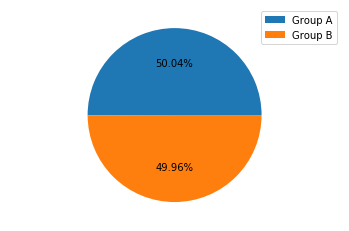

In [10]:
plt.axis('equal')
plt.pie(ab_counts, autopct='%0.2f%%')
plt.legend(['Group A', 'Group B'])
plt.savefig('ab_test_pie_chart.png')
plt.show()



Create new column to identify which customer filled out an application or not. A check is performed at end to confirm column creation is correct.

In [11]:
ab_data_frame['is_application'] = ab_data_frame.application_date.apply(lambda x: 'Application' if pd.isna(x) != True else 'No Application')

print(ab_data_frame.head())

  first_name last_name  gender                   email visit_date  \
0        Kim    Walter  female   KimWalter58@gmail.com     7-1-17   
1        Tom   Webster    male        TW3857@gmail.com     7-1-17   
2     Edward     Bowen    male  Edward.Bowen@gmail.com     7-1-17   
3     Marcus     Bauer    male  Marcus.Bauer@gmail.com     7-1-17   
4    Roberta      Best  female      RB6305@hotmail.com     7-1-17   

  fitness_test_date application_date purchase_date ab_test_group  \
0        2017-07-03             None          None             A   
1        2017-07-02             None          None             A   
2              None       2017-07-04    2017-07-04             B   
3        2017-07-01       2017-07-03    2017-07-05             A   
4        2017-07-02             None          None             A   

   is_application  
0  No Application  
1  No Application  
2     Application  
3     Application  
4  No Application  


Let's see how many people from Group A and Group B either do or don't pick up an application.

In [12]:
app_counts = ab_data_frame.groupby(['ab_test_group', 'is_application']).first_name.count().reset_index()

print(app_counts.head())

  ab_test_group  is_application  first_name
0             A     Application         250
1             A  No Application        2254
2             B     Application         325
3             B  No Application        2175


Pivot the table for ease of readability and analysis.

In [13]:
app_pivot = app_counts.pivot(columns='is_application', index='ab_test_group', values = 'first_name').reset_index()
print(app_pivot.head())

is_application ab_test_group  Application  No Application
0                          A          250            2254
1                          B          325            2175


Let's calculate the sum of all applications statuses to make percentage calculations easier.

In [14]:
app_pivot['Total'] = app_pivot.Application + app_pivot['No Application']
print(app_pivot.head())

is_application ab_test_group  Application  No Application  Total
0                          A          250            2254   2504
1                          B          325            2175   2500


Calculate column that holds percentage of people who have an application for Group A and Group B.

### Inferential Analysis

In [15]:
app_pivot['Percent with Application'] = app_pivot.Application/app_pivot.Total
print(app_pivot.head())

is_application ab_test_group  Application  No Application  Total  \
0                          A          250            2254   2504   
1                          B          325            2175   2500   

is_application  Percent with Application  
0                                0.09984  
1                                0.13000  


It looks like more people from Group B turned in an application than from Group A; let's test for statistical significance by performing a chi-square hypothesis test.

In [16]:
from scipy import stats

X = [[250, 2254],
     [325, 2175]]

chi2, pval, dof, expected = stats.chi2_contingency(X)

pval

0.0009647827600722304

The p-value is less than 0.05, so we reject the null hypothesis that more people from Group B did not turn in applications than people from Group A. This might be because people from Group B did not have to perform a fitness test to get the gym application; less work for Group B people to get their hands on a gym application.

Let's check how many people purchased a membership. Create a new column that lists membership status. A check is performed to ensure accuracy of code.

In [17]:
ab_data_frame['is_member'] = ab_data_frame.purchase_date.apply(lambda x: 'Member' if pd.isna(x) == False else 'Not Member')
print(ab_data_frame.head())

  first_name last_name  gender                   email visit_date  \
0        Kim    Walter  female   KimWalter58@gmail.com     7-1-17   
1        Tom   Webster    male        TW3857@gmail.com     7-1-17   
2     Edward     Bowen    male  Edward.Bowen@gmail.com     7-1-17   
3     Marcus     Bauer    male  Marcus.Bauer@gmail.com     7-1-17   
4    Roberta      Best  female      RB6305@hotmail.com     7-1-17   

  fitness_test_date application_date purchase_date ab_test_group  \
0        2017-07-03             None          None             A   
1        2017-07-02             None          None             A   
2              None       2017-07-04    2017-07-04             B   
3        2017-07-01       2017-07-03    2017-07-05             A   
4        2017-07-02             None          None             A   

   is_application   is_member  
0  No Application  Not Member  
1  No Application  Not Member  
2     Application      Member  
3     Application      Member  
4  No Applicatio

Let's see how many people filled out an application AND purchased a membership. Create a dataframe to hold people who filled out an application.

In [18]:
applications_only = ab_data_frame[ab_data_frame.is_application == 'Application' ]
print(applications_only.head())

   first_name last_name  gender                    email visit_date  \
2      Edward     Bowen    male   Edward.Bowen@gmail.com     7-1-17   
3      Marcus     Bauer    male   Marcus.Bauer@gmail.com     7-1-17   
9    Salvador  Cardenas    male  SCardenas1980@gmail.com     7-1-17   
11    Valerie     Munoz  female     VMunoz1998@gmail.com     7-1-17   
35    Michael     Burks    male         MB9820@gmail.com     7-1-17   

   fitness_test_date application_date purchase_date ab_test_group  \
2               None       2017-07-04    2017-07-04             B   
3         2017-07-01       2017-07-03    2017-07-05             A   
9         2017-07-07       2017-07-06          None             A   
11        2017-07-03       2017-07-05    2017-07-06             A   
35              None       2017-07-07    2017-07-13             B   

   is_application   is_member  
2     Application      Member  
3     Application      Member  
9     Application  Not Member  
11    Application      Member 

Create a pivot table to identify which people who did fill out an application are members of Group A or Group B, and if they purchased a membership or not.

In [19]:
applic_counts = applications_only.groupby(['ab_test_group', 'is_member']).first_name.count().reset_index()
applic_pivot = applic_counts.pivot(columns='is_member', index='ab_test_group', values = 'first_name').reset_index()
applic_pivot['Total'] = applic_pivot.Member + applic_pivot['Not Member']
applic_pivot['Percent_Membership'] = applic_pivot.Member/applic_pivot.Total

print(applic_pivot)

is_member ab_test_group  Member  Not Member  Total  Percent_Membership
0                     A     200          50    250            0.800000
1                     B     250          75    325            0.769231


It looks like of the people that filled out an application, Group A has more people who also purchased a membership than Group B. Let's check if this statement has statistical significance by running a hypothesis test.

In [20]:
Y = [[200, 50], [250, 75]]

chi2, pval, dof, expected = stats.chi2_contingency(Y)

pval

0.43258646051083327

The p-value is greater than 0.05, so we do not reject the null hypothesis that for people who filled out an application, Group A does not have more people than Group B who purchased a membership. This might be because maybe people in Group A did well on the fitness test and felt they didn't need a gym membership; they could simply continue with their health activities as they currently were; alternatively, it could be people in Group A did not do well on the fitness test and felt that they were not a good fit for the gym, believing that the fitness test was a barrier to entry for gym membership. Clearly, more data would need to be collected to understand the underlying mechanism for this result.

Let's find out for all people who visited the gym, regardless if they filled out an application or not, what percent purchased gym memberships. Create a pivot table to make analysis easier.

In [21]:
memb_counts = ab_data_frame.groupby(['ab_test_group', 'is_member']).first_name.count().reset_index()
print(memb_counts.head())

  ab_test_group   is_member  first_name
0             A      Member         200
1             A  Not Member        2304
2             B      Member         250
3             B  Not Member        2250


Pivot the table to make it easier to see our results.

In [22]:
purch_pivot = memb_counts.pivot(columns='is_member', index='ab_test_group', values = 'first_name').reset_index()
print(purch_pivot.head())

is_member ab_test_group  Member  Not Member
0                     A     200        2304
1                     B     250        2250


Add new column "Total" and "Percent Purchase". Calculate the sum of all who visited the gym by group and percent who purchased a gym membership.

In [23]:
purch_pivot['Total'] = purch_pivot.Member + purch_pivot['Not Member']
purch_pivot['Percent Purchase'] = purch_pivot.Member/purch_pivot.Total
print(purch_pivot.head())

is_member ab_test_group  Member  Not Member  Total  Percent Purchase
0                     A     200        2304   2504          0.079872
1                     B     250        2250   2500          0.100000


It looks like more people from Group B purchased a membership than people from Group A. Let's check if this statement has statistical significance by running a hypothesis test. 

In [24]:
Z = [[200, 2304], [250, 2250]]

chi2, pval, dof, expected = stats.chi2_contingency(Z)
pval

0.014724114645783203

The p-value is less than 0.05, so we reject the null hypothesis that more people from Group B did not have more gym membership purchases than people from Group A. This could be because Group B people did not have to take the fitness test like people in Group A and had less barriers to using the gym; therefore, there were more people from Group B who purchased a gym membership.

Let's summarize the acquisition funnel with visualizations for ease of understanding. 

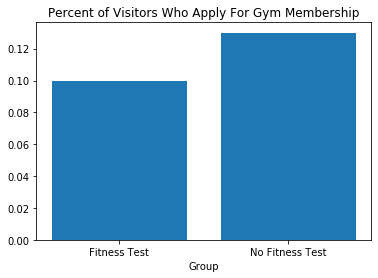

In [25]:
heights = app_pivot['Percent with Application']
x_values = app_pivot['ab_test_group']
ax = plt.subplot()
plt.bar(x_values, heights)
plt.xlabel('Group')
plt.title('Percent of Visitors Who Apply For Gym Membership')
ax.set_xticklabels(['Fitness Test','No Fitness Test']) 
plt.show()



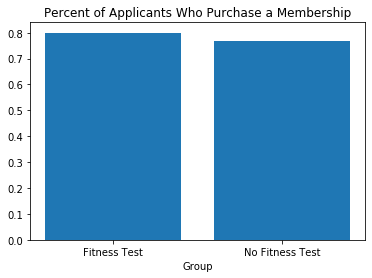

In [26]:
heights = applic_pivot.Percent_Membership
x_values = applic_pivot['ab_test_group']
ax = plt.subplot()
plt.bar(x_values, heights)
plt.xlabel('Group')
plt.title('Percent of Applicants Who Purchase a Membership')
ax.set_xticklabels(['Fitness Test','No Fitness Test']) 
plt.show()




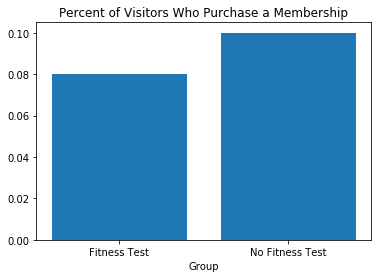

In [27]:
heights = purch_pivot['Percent Purchase']
x_values = purch_pivot['ab_test_group']
ax = plt.subplot()
plt.bar(x_values, heights)
plt.xlabel('Group')
plt.title('Percent of Visitors Who Purchase a Membership')
ax.set_xticklabels(['Fitness Test','No Fitness Test']) 
plt.show()

### Conclusion

Based on the exploratory and inferential analysis, it looks like there is a higher percentage of visitors who apply for a gym membership that do not take the fitness test; we can say this with confidence. Perhaps this is because visitors did not have to perform a fitness test to get the gym application; less work for these visitors to get their hands on a gym application. 

For visitors who did turn in an application, it seems that more people who took the fitness test purchased a membership; however, we can't say this with confidence as this result is not statistically significant. Perhaps this is because visitors who did take the fitness test did well on the fitness test and felt they didn't need a gym membership; they could simply continue with their health activities as they currently were. Alternatively, it could be visitors who took the fitness test did not do well on the fitness test and felt that they were not a good fit for the gym, essentially the fitness test acted as a barrier to entry for gym membership. Clearly, more data would need to be collected to understand the underlying mechanism for this result.

Finally, looking at all visitors to the gym, there were more visitors who did not take the fitness test who also purchased a gym membership. This could be because these visitors did not have to take the fitness test and had less barriers to using the gym which would include making a gym membership purchase.

Overall, my business recommendation is that incorporating a fitness test into the acquisition funnel for gym membership does not seem to help the process. 